# Brownian motion

- [Summary of simulation methods](#summary)
- [Simulations with on-the-fly animation](#simulation)

<div id="summary" />

## Summary of simulation methods

##### Original differential equation

\begin{equation}
\frac{d\mathbf{R}(t)}{dt}=\mathbf{V}(t)\tag{F1}
\end{equation}

\begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=\color{black}{-\zeta\mathbf{V}(t)}+\color{black}{\mathbf{F}(t)} 
\tag{F2}
\end{equation}
$\hspace{80mm}$with
\begin{equation}
\langle \mathbf{F}(t)\rangle=\mathbf{0} 
\tag{F3}
\end{equation}

\begin{equation}
\langle \mathbf{F}(t)\mathbf{F}(0)\rangle = {2k_B T\zeta}\mathbf{I}\delta(t)  
\tag{F4}
\end{equation}

##### Euler method

$$
\mathbf{V}_{i+1}
=\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} {\Delta \mathbf{W}_i} 
\tag{F9}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}_i \Delta t \hspace{15mm}\tag{B3}
$$
$\hspace{80mm}$with
\begin{equation}
\langle \Delta \mathbf{W}_i\rangle=\mathbf{0} 
\tag{F10}
\end{equation}

\begin{equation}
\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}  
\tag{F11}
\end{equation}

##### 2nd order Runge-Kutta method

$$
\mathbf{V}'_{i+\frac{1}{2}}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i}  
=\left(1-\frac{\zeta}{m}\frac{\Delta t}{2}\right)\mathbf{V}_{i}  
\tag{F12}
$$

$$
\mathbf{V}_{i+1}
=\mathbf{V}_i-\frac{\zeta}{m}\Delta t\mathbf{V}'_{i+\frac{1}{2}} + \frac{1}{m} {\Delta \mathbf{W}_i} 
\tag{F13}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}'_{i+\frac{1}{2}} \Delta t \hspace{15mm}
\tag{F14}
$$

##### 4th order Runge-Kutta method

$$
\mathbf{V}'_{i+\frac{1}{2}}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i}  
\tag{F15}
$$

$$
\mathbf{V}''_{i+\frac{1}{2}}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}'_{i+\frac{1}{2}}  
\tag{F16}
$$

$$
\mathbf{V}'''_{i+1}
=\mathbf{V}_i-\frac{\zeta}{m}{\Delta t}\mathbf{V}''_{i+\frac{1}{2}}  
\tag{F17}
$$


$$
\mathbf{V}_{i+1}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{6}\left(\mathbf{V}+\mathbf{V}'_{i+\frac{1}{2}}+\mathbf{V}''_{i+\frac{1}{2}}+\mathbf{V}'''_{i+1}\right) + \frac{1}{m} {\Delta \mathbf{W}_i} 
\tag{F18}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+
\frac{\Delta t}{6}\left(\mathbf{V}+\mathbf{V}'_{i+\frac{1}{2}}+\mathbf{V}''_{i+\frac{1}{2}}+\mathbf{V}'''_{i+1}\right)
\hspace{15mm}
\tag{F19}
$$

<div id="simulation" />

## Simulations with on-the-fly animation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg
plt.style.use("ggplot")

def init():
    global R, V, W, Rs, Vs, Ws, time
    R[:, :] = 0.0
    V[:, :] = 0.0
    W[:, :] = 0.0
    Rs[:, :, :] = 0.0
    Vs[:, :, :] = 0.0
    Ws[:, :, :] = 0.0
    time[:] = 0.0
    title.set_text(r"")
    line.set_data([], []) # set line data to show the trajectory of particle n in 2d (x,y)
    line.set_3d_properties([]) # add z-data separately for 3d plot
    particles.set_data([], []) # set position current (x,y) position data for all particles
    particles.set_3d_properties([]) # add current z data of particles to get 3d plot
    return particles, title, line

# Solve by Euler method.
def animate(i):
    global R, V, W, Rs, Vs, Ws, time
    time[i] = i*dt
    W = std*np.random.randn(nump, dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    R, V = R + V*dt, V*(1 - zeta/m*dt) + W/m # update R & V via Eqs.(F5) and (F9)
    Rs[i, :, :] = R
    Vs[i, :, :] = V
    Ws[i, :, :] = W
    title.set_text(r"t = " + str(time[i])) # set the title to display the current time
    line.set_data(Rs[:i+1, n, 0], Rs[:i+1, n, 1]) # set the line in 2D (x,y)
    line.set_3d_properties(Rs[:i+1, n, 2]) # add z axis to set the line in 3D
    particles.set_data(R[:, 0], R[:, 1]) # set the current position of all the particles in 2d (x,y)
    particles.set_3d_properties(R[:, 2]) # add z axis to set the particle in 3D
    return particles, title, line

# Solve by 2nd order Runge-Kutta method
"""
V1 = np.zeros([nump, dim])

def animate(i):
    global R, V, W, Rs, Vs, Ws, time
    time[i] = i*dt
    W = std*np.random.randn(nump, dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    # 2nd order Runge-Kutta method
    V1 = V*(1 - zeta/m*0.5*dt)
    V = V - V1*zeta/m*dt+W/m
    R = R + V1*dt
    Rs[i, :, :] = R
    Vs[i, :, :] = V
    Ws[i, :, :] = W
    title.set_text(r"t = " + str(time[i]))
    line.set_data(Rs[:i+1, n, 0], Rs[:i+1, n, 1])
    line.set_3d_properties(Rs[:i+1, n, 2])
    particles.set_data(R[:, 0], R[:, 1])
    particles.set_3d_properties(R[:, 2])
    return particles, title, line
"""

'\nV1 = np.zeros([nump, dim])\n\ndef animate(i):\n    global R, V, W, Rs, Vs, Ws, time\n    time[i] = i*dt\n    W = std*np.random.randn(nump, dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)\n    # 2nd order Runge-Kutta method\n    V1 = V*(1 - zeta/m*0.5*dt)\n    V = V - V1*zeta/m*dt+W/m\n    R = R + V1*dt\n    Rs[i, :, :] = R\n    Vs[i, :, :] = V\n    Ws[i, :, :] = W\n    title.set_text(r"t = " + str(time[i]))\n    line.set_data(Rs[:i+1, n, 0], Rs[:i+1, n, 1])\n    line.set_3d_properties(Rs[:i+1, n, 2])\n    particles.set_data(R[:, 0], R[:, 1])\n    particles.set_3d_properties(R[:, 2])\n    return particles, title, line\n'

<IPython.core.display.Javascript object>


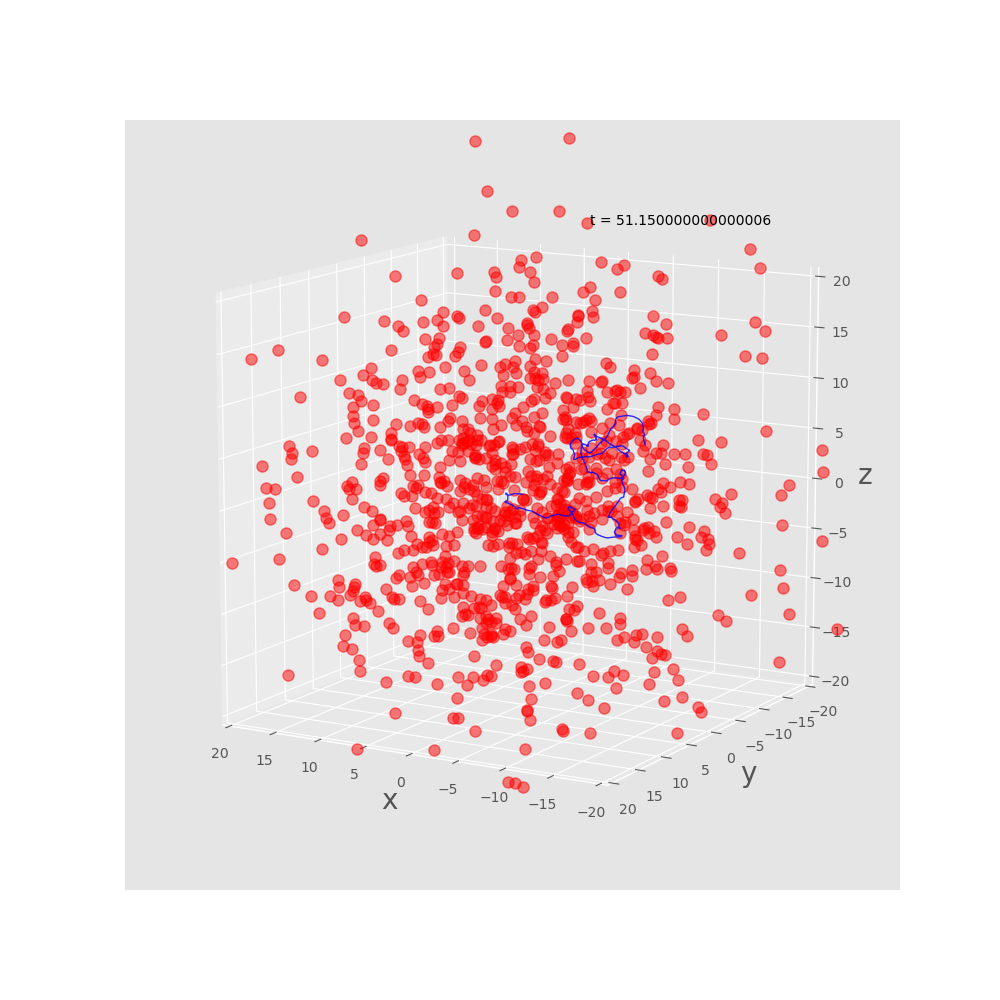

In [2]:
dim = 3 # system dimension (x,y,z)
nump = 1000 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m = 1.0 # set particle mass, m
kBT = 1.0 # set temperatute, k_B T
std = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)

np.random.seed(0)
R = np.zeros([nump, dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump, dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump, dim]) # array to store current random forcces
Rs = np.zeros([nums, nump, dim]) # array to store positions at all steps
Vs = np.zeros([nums, nump, dim]) # array to store velocities at all steps
Ws = np.zeros([nums, nump, dim]) # array to store random forces at all steps
time = np.zeros([nums])

fig = plt.figure(figsize=(10, 10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111, projection="3d")
box = 40 # set draw area as box^3
ax.set_xlim(-box/2, box/2)
ax.set_ylim(-box/2, box/2)
ax.set_zlim(-box/2, box/2)
ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
ax.set_zlabel(r"z", fontsize=20)
ax.view_init(elev=12, azim=120)
particles, = ax.plot([], [], [], "ro", ms=8, alpha=0.5)
title = ax.text(-180., 0. , 250., r"", transform=ax.transAxes, va="center")
line, = ax.plot([], [], [], "b", lw=1, alpha=0.8)

n = 0 # trajectry line is plotted for the n-th particle

anim = animation.FuncAnimation(fig, func=animate, init_func=init, frames=nums , interval=5, blit=True, repeat=False)

## If you have ffmpeg installed on your machine 
## you can save the animation by uncomment the last line
## You may install ffmpeg by typing the following command in command prompt
## conda install -c menpo ffmpeg
## 
# anim.save("movie.mp4",fps=50,dpi=100)